In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [8]:
data = load_iris()
X = data.data
Y = data.target

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=48)

In [10]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(f"accuracy_score: {accuracy_score(Y_test, y_pred)}")

accuracy_score: 0.9210526315789473


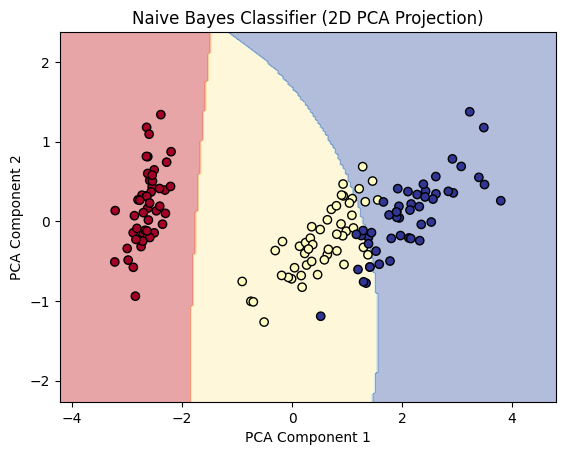

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

# Load data
data = load_iris()
X = data.data
y = data.target

# Reduce to 2D using PCA for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train Naive Bayes on reduced data
model = GaussianNB()
model.fit(X_pca, y)

# Create meshgrid for plotting
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict for meshgrid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.title("Naive Bayes Classifier (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
